# Classifying plant as Diseased or Healthy

> **Here plant is classfied whether diseased or not based on its features with tensorflow.**

> **Dependencies are :- numpy , opencv (cv2) , os**

   



In [1]:
import numpy as np
import matplotlib.pyplot as pt
import os
import cv2

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img
from tensorflow.keras.optimizers import RMSprop

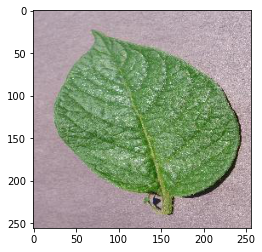

In [3]:
img=image.load_img('6f4b9acd-f34d-4771-a6bc-2001de2dd1d3___RS_HL 1898.jpg')
pt.imshow(img)

In [4]:
cv2.imread('6f4b9acd-f34d-4771-a6bc-2001de2dd1d3___RS_HL 1898.jpg')

array([[[179, 168, 184],
        [176, 165, 181],
        [172, 161, 177],
        ...,
        [137, 127, 143],
        [187, 177, 193],
        [160, 150, 166]],

       [[175, 164, 180],
        [172, 161, 177],
        [170, 159, 175],
        ...,
        [175, 165, 181],
        [215, 205, 221],
        [215, 205, 221]],

       [[171, 160, 176],
        [170, 159, 175],
        [169, 158, 174],
        ...,
        [153, 143, 159],
        [190, 180, 196],
        [180, 170, 186]],

       ...,

       [[162, 151, 171],
        [159, 148, 168],
        [155, 144, 164],
        ...,
        [171, 165, 184],
        [180, 174, 193],
        [156, 150, 169]],

       [[164, 153, 173],
        [159, 148, 168],
        [153, 142, 162],
        ...,
        [184, 178, 197],
        [188, 182, 201],
        [147, 141, 160]],

       [[161, 150, 170],
        [156, 145, 165],
        [150, 139, 159],
        ...,
        [166, 160, 179],
        [168, 162, 181],
        [167, 161, 180]]

In [5]:
cv2.imread('6f4b9acd-f34d-4771-a6bc-2001de2dd1d3___RS_HL 1898.jpg').shape

(256, 256, 3)

In [6]:
train= ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset=train.flow_from_directory('training',target_size=(256,256),class_mode='binary',batch_size=70)

Found 539 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Disease': 0, 'Healthy': 1}

In [9]:
valid_dataset=validation.flow_from_directory('validation',target_size=(256,256),class_mode='binary',batch_size=70)

Found 169 images belonging to 2 classes.


In [10]:
valid_dataset.class_indices

{'Disease': 0, 'Healthy': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
model= tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)),     # INPUT LAYER
     tf.keras.layers.MaxPool2D(2,2),                                                 # Takes max pixcels 

     tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
     tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)),
     tf.keras.layers.MaxPool2D(2,2) ,

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(512,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(lr=0.1),
              metrics=['accuracy']
              )


In [14]:
model_fit= model.fit( 
    train_dataset, steps_per_epoch=7,
    epochs=15 , validation_data=valid_dataset 
)

Epoch 1/15
7/7 [==============================] - 13s 2s/step - loss: 14479489.0000 - accuracy: 0.4563 - val_loss: 88375.5156 - val_accuracy: 0.3669
Epoch 2/15
7/7 [==============================] - 12s 2s/step - loss: 173351.8594 - accuracy: 0.4968 - val_loss: 4466.2583 - val_accuracy: 0.6331
Epoch 3/15
7/7 [==============================] - 12s 2s/step - loss: 3250.0889 - accuracy: 0.4968 - val_loss: 834.5374 - val_accuracy: 0.3669
Epoch 4/15
7/7 [==============================] - 12s 2s/step - loss: 513.1440 - accuracy: 0.5139 - val_loss: 622.6325 - val_accuracy: 0.3669
Epoch 5/15
7/7 [==============================] - 12s 2s/step - loss: 284.9040 - accuracy: 0.5864 - val_loss: 166.5357 - val_accuracy: 0.3669
Epoch 6/15
7/7 [==============================] - 18s 3s/step - loss: 180.4170 - accuracy: 0.5139 - val_loss: 169.0564 - val_accuracy: 0.3669
Epoch 7/15
7/7 [==============================] - 17s 2s/step - loss: 50.1680 - accuracy: 0.5394 - val_loss: 20.6172 - val_accuracy: 0.3

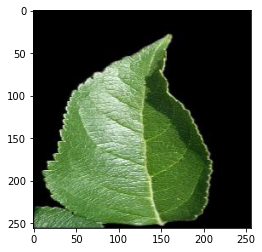

Disease Plant


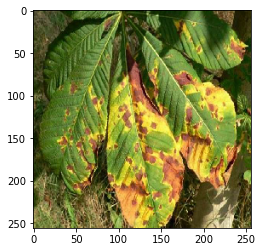

Disease Plant


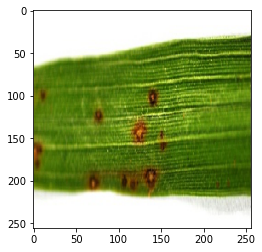

Disease Plant


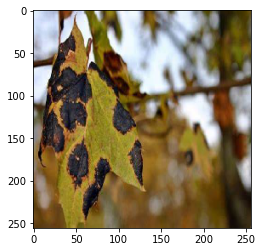

Disease Plant


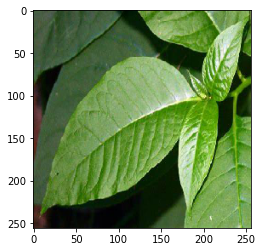

Healthy Plant


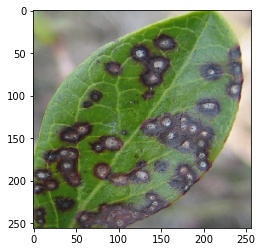

Healthy Plant


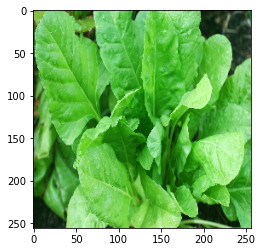

Healthy Plant


In [15]:
path= 'testing'
for i in os.listdir(path):
  img = load_img(path +'//'+ i,target_size=(256,256))
  pt.imshow(img)
  pt.show()

  X= image.img_to_array(img)
  X= np.expand_dims(X,axis=0)
  images=np.hstack([X])
  v=model.predict(images)

  if v==1:
    print ("Healthy Plant")
  else :
    print ("Disease Plant")  


In [18]:
! pip install anvil-uplink


  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [19]:
import anvil.server
anvil.server.connect("PQSQ3IRPUBYBF7NCQUJWIGPC-OEHKDMBGYW7LXGHA")
import PIL

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [28]:
import anvil.media
@anvil.server.callable
def classify_image(file):
  img = load_img(file,target_size=(256,256))
  X= image.img_to_array(img)
  X= np.expand_dims(X,axis=0)
  
  v=model.predict(X)

  return('Diseased Plant' if (score==0) else 'Healthy Plant' ,float (score))

In [27]:
#classify_image('6f4b9acd-f34d-4771-a6bc-2001de2dd1d3___RS_HL 1898.jpg')
    